In [9]:
%config IPCompleter.greedy=True
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('data/MountEverest.csv')
X = np.array(data['distance'])
Y = np.array(data['height'])

In [13]:
def poly_product(polynomials) -> np.poly:
    product = 1
    for polynomial in polynomials:
        product *= polynomial
    return product

In [14]:
def phi(x_samples:np.ndarray, i:int) -> np.float64:
    nominator = poly_product([np.poly1d([1, -x_sample]) for k, x_sample in enumerate(x_samples) if i != k])
    denominator = np.prod([x_samples[i] - x_sample for k, x_sample in enumerate(x_samples) if i != k])
    return nominator / denominator

In [15]:
def lagrange(x:np.ndarray, x_samples:np.ndarray, y_samples:np.ndarray) -> np.ndarray:
    phis = [phi(x_samples, i) for i,_ in enumerate(x_samples)]
    def evaluate(x:np.float64, phis:list, y_samples:np.ndarray) -> np.float64:
        return np.sum([y * phis[i](x) for i, y in enumerate(y_samples)])
    return np.array([evaluate(x_, phis, y_samples) for x_ in x])

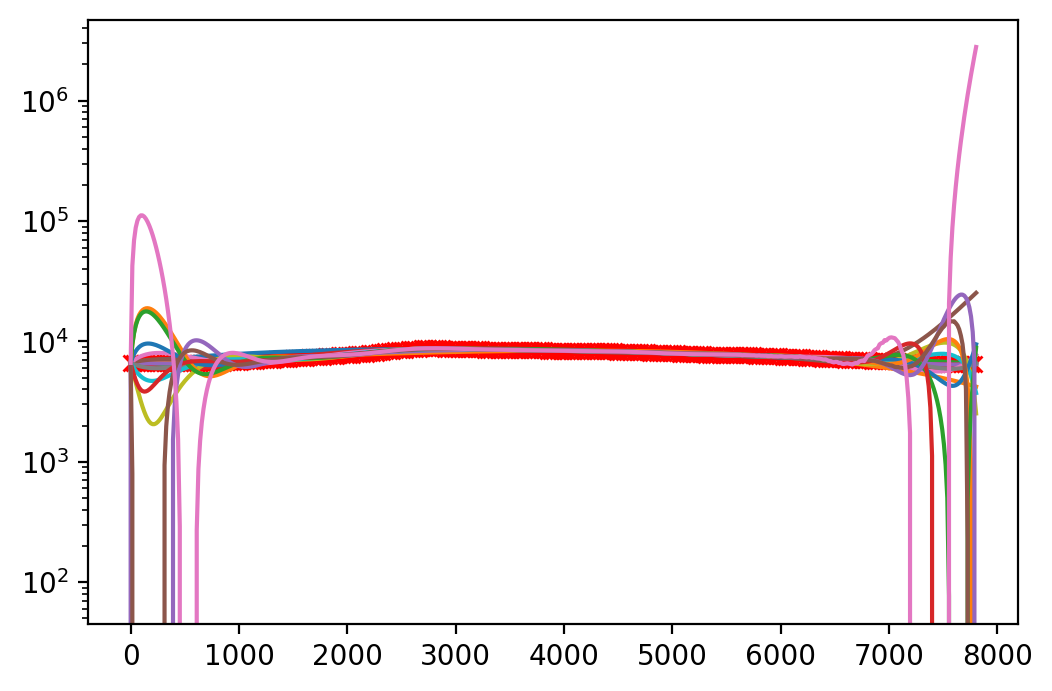

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [91]:
x = np.linspace(0, max(X), 500)
fig, ax = plt.subplots(dpi=200)
freq = int(len(X)//200)
ax.semilogy(X[0::freq], Y[0::freq], 'x', color='red')
for nodes in range(3, 20):
    freq = int(len(X)//nodes)
    plt.figure(dpi=200)
    l = lagrange(x, X[0::freq], Y[0::freq], )
    ax.semilogy(x, l)
fig.show()
